# Install missing python modules

In [78]:
import sys
!{sys.executable} -m pip install skrebate

  Created wheel for skrebate: filename=skrebate-0.61-py3-none-any.whl size=29262 sha256=28ebf25c89b342fcb7ac5e24b94a719fae849292186fb3144511ae7140a279ee
  Stored in directory: c:\users\hramzr\appdata\local\pip\cache\wheels\91\0b\c3\aecd291cc0835d83276faea0a3fbc83ba2f7285fd6ca4d9ae8
Successfully built skrebate


# Global imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from ReliefF import ReliefF
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# Pair plot of phenotype data (=discovering pairwise correlation)

c:\users\miker\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\miker\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\miker\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\miker\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


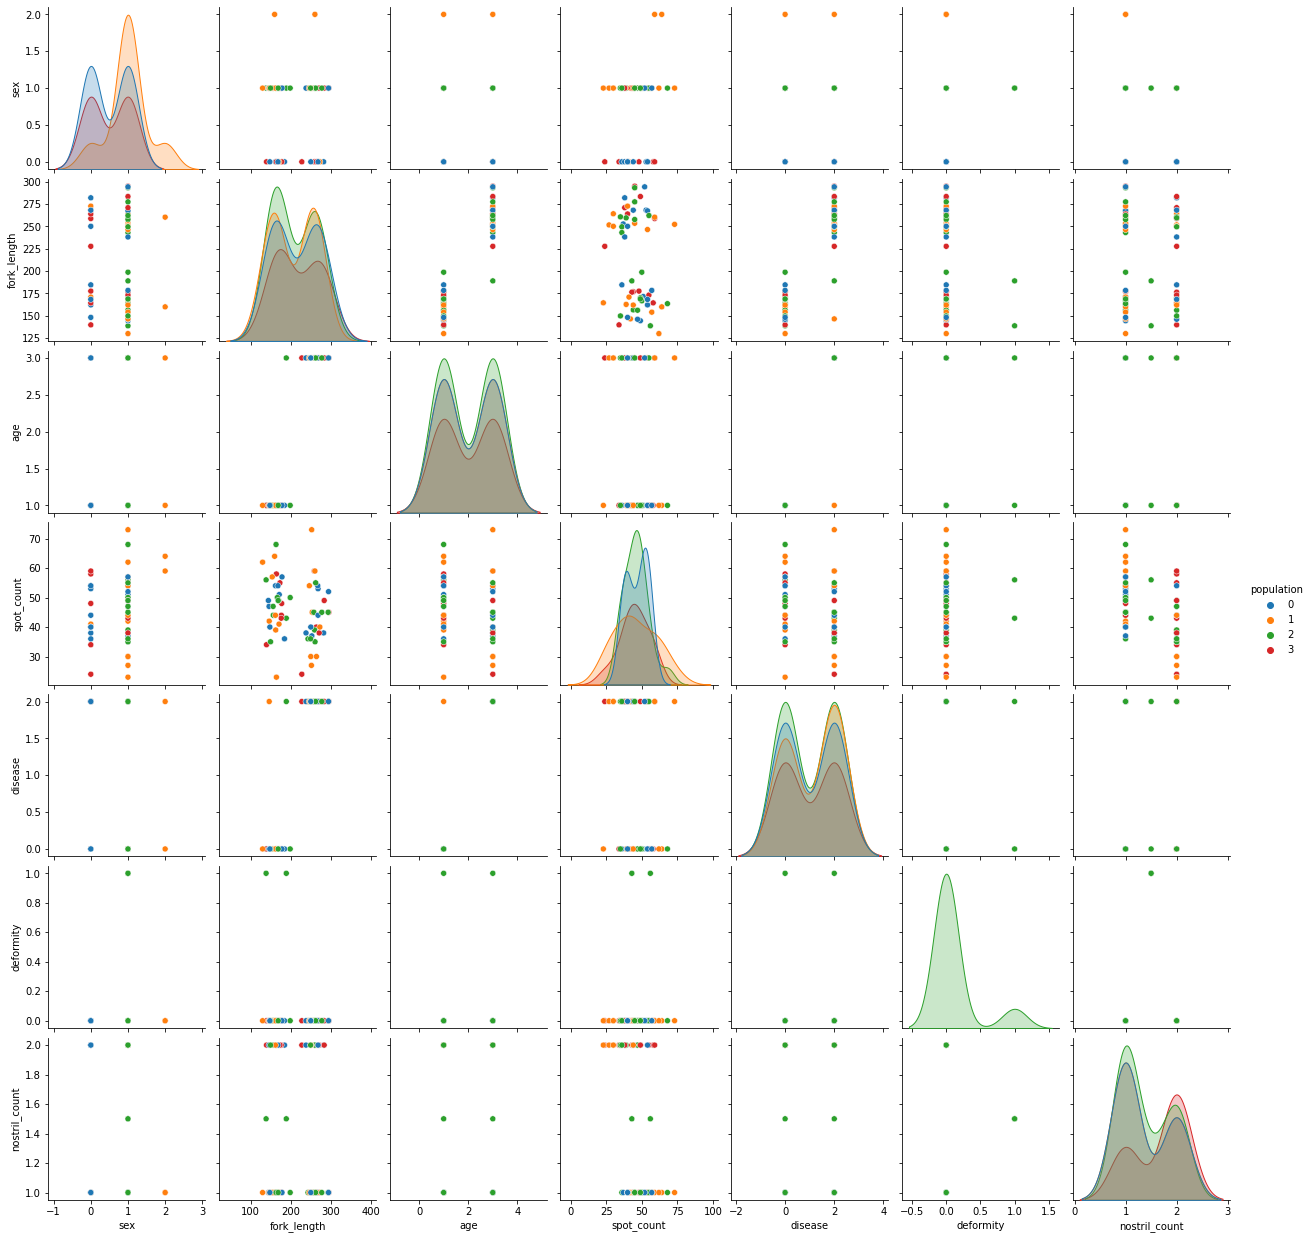

In [55]:
growth_df=pd.read_csv('growth_SV', delimiter=" ")
#factorize sex and population to use in PP
growth_df['sex'] = pd.factorize(growth_df.sex)[0]
growth_df['population'] = pd.factorize(growth_df.population)[0]
# Slicing out the phenotype data
data=growth_df.iloc[:, 0:9]
# Exclude indv from pairing, by putting it as index
data=data.set_index('indv')
# Sex 0 = male, sex 1 = unknown and sex 2 = female
# pop 0 = 2013B12, pop 1 = 2013B11, pop 2 = 2013B9 and pop 3 = 2013B10
sns.pairplot(data, hue="age", palette="tab10")

# Categorising fork_length


#### Load growth data for SV's

In [2]:
growth_df=pd.read_csv('SV_growth_10kb_1kb_5', delimiter=" ")  

#### Split data in year 1 and year 3 data

In [3]:
growth_y1 = growth_df.loc[(growth_df['age'] == 1)]
growth_y3 = growth_df.loc[(growth_df['age'] == 3)]

In [16]:
growth_df

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_dels_10000,...,LG25_ins_3800000,LG25_invs_3800000,LG25_dels_3810000,LG25_dups_3810000,LG25_ins_3810000,LG25_invs_3810000,LG25_dels_3820000,LG25_dups_3820000,LG25_ins_3820000,LG25_invs_3820000
0,27033489,male,2013B12,268.211388,3,53.0,2.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,27033489,male,2013B12,162.068598,1,54.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,83800743,unknown,2013B11,162.617027,1,39.0,0.0,0.0,2.0,0,...,0,0,1,0,0,0,0,0,0,0
3,83800743,unknown,2013B11,264.152366,3,30.0,2.0,0.0,2.0,0,...,0,0,1,0,0,0,0,0,0,0
4,140942470,unknown,2013B9,156.474088,1,44.0,0.0,0.0,1.0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,985661182,unknown,2013B9,149.724143,1,35.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
59,986994303,male,2013B12,250.116536,3,40.0,2.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
60,986994303,male,2013B12,148.071168,1,40.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
61,998916898,unknown,2013B9,168.723524,1,49.0,0.0,0.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Density')

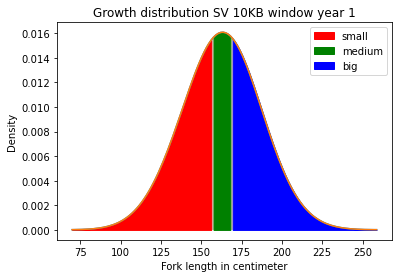

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

small=growth_y1.loc[(growth_y1['fork_length'] >= min(growth_y1.fork_length)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.33))]

medium=growth_y1.loc[(growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.33)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.66))]

big=growth_y1.loc[growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.66)]

small_medium=small.append(medium)
binned_y1=small_medium.append(big)

sns.kdeplot(binned_y1['fork_length'], shade=True, legend=True, bw=20)
points = sns.kdeplot(binned_y1['fork_length'], shade=True, bw=20).get_lines()[0].get_data()

x = points[0]
y = points[1]
plt.fill_between(x,y, where = x <= small['fork_length'].max(), color='r')
plt.fill_between(x,y, where = (x <=medium['fork_length'].max()) & (x > small['fork_length'].max()), color='g')
plt.fill_between(x,y, where = (x >medium['fork_length'].max()), color='blue')


red_patch = mpatches.Patch(color='red', label='small')
green_patch = mpatches.Patch(color='green', label='medium')
blue_patch = mpatches.Patch(color='blue', label='big')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title("Growth distribution SV 10KB window year 1")
plt.xlabel("Fork length in centimeter")
plt.ylabel("Density")

#### Bin into small --> medium --> big

##### Year 1

In [4]:
small=growth_y1.loc[(growth_y1['fork_length'] >= min(growth_y1.fork_length)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y1.loc[(growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.33)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y1.loc[growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y1=small_medium.append(big)

<ipython-input-4-500e8c2916d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-4-500e8c2916d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-4-500e8c2916d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

##### Year 3

In [5]:
small=growth_y3.loc[(growth_y3['fork_length'] >= min(growth_y3.fork_length)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y3.loc[(growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.33)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y3.loc[growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y3=small_medium.append(big)

<ipython-input-5-3ebd253edfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-5-3ebd253edfbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-5-3ebd253edfbf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [6]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
x=binned_y3.drop('fork_length',1)
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor


binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
x=binned_y1.drop('fork_length',1)
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

--- Classifiers with all features and year 3 data ---

KNN 0.375
Naive Bayes 0.4375
Logistic regression 0.3125
Random forest 0.375
--- Classifiers with all features and year 1 data ---

KNN 0.3125
Naive Bayes 0.25
Logistic regression 0.25
Random forest 0.1875


array(['big', 'big', 'medium', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big'], dtype=object)

# Do relief F feature selection

## Overview of target

In [14]:
print(binned_y1['fork_length'].value_counts())
print(binned_y3['fork_length'].value_counts())

small     11
big       11
medium    10
Name: fork_length, dtype: int64
big       11
small     10
medium    10
Name: fork_length, dtype: int64


## Start with year 1

In [142]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
genetic_data=binned_y1
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs1 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs1.fit(features, labels, headers)
reliefdict1={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs1.feature_importances_):
    reliefdict1[feature_score]=feature_name

Created distance array in 2.9745070934295654 seconds.
Feature scoring under way ...
Completed scoring in 564.0857043266296 seconds.
Created distance array in 1.5796003341674805 seconds.
Feature scoring under way ...
Completed scoring in 343.7541313171387 seconds.
Created distance array in 0.8167853355407715 seconds.
Feature scoring under way ...
Completed scoring in 150.33671402931213 seconds.


## Get top 25 scores year 1

In [271]:
# print(reliefdict)
y1_relief_top=[]
for value in fs1.top_features_[0:25]:
    score=fs1.feature_importances_[value]
    y1_relief_top.append(reliefdict1[score])
    
print(y1_relief_top)

['LG15_dels_9320000', 'LG18_ins_4960000', 'LG21_dels_1930000', 'LG12_dels_4000000', 'LG9_dels_5380000', 'LG4_dels_1630000', 'LG15_dels_2390000', 'LG18_dels_8800000', 'LG11_dels_7660000', 'LG6_dels_8980000', 'LG19_dels_4820000', 'LG18_dels_10490000', 'LG18_dels_6550000', 'LG19_dels_14730000', 'LG19_dels_14730000', 'LG7_dels_2770000', 'LG18_dels_15860000', 'LG6_dels_15610000', 'LG6_dels_15610000', 'LG18_dels_900000', 'LG2_dels_11400000', 'LG21_dels_11590000', 'LG17_ins_4800000', 'LG15_dels_2350000', 'LG15_dels_2350000']


## Get prediction year 1

In [268]:
x=binned_y1[y1_relief_top]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y1_relief_top)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with TuRF Relief-F top 25 features and year 1 data ---

KNN 0.9375
Naive Bayes 0.9375
Logistic regression 1.0
Random forest 0.9375
SVM 0.9375


## Now do year 3

In [145]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
genetic_data=binned_y3
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs3 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs3.fit(features, labels, headers)
reliefdict3={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs3.feature_importances_):
    reliefdict3[feature_score]=feature_name

Created distance array in 3.2075693607330322 seconds.
Feature scoring under way ...
Completed scoring in 581.3338894844055 seconds.
Created distance array in 1.6950206756591797 seconds.
Feature scoring under way ...
Completed scoring in 292.4308669567108 seconds.
Created distance array in 0.8117575645446777 seconds.
Feature scoring under way ...
Completed scoring in 153.49316573143005 seconds.


## Get top 25 year 3

In [265]:
# print(reliefdict)
y3_relief_top=[]
for value in fs3.top_features_[0:25]:
    score=fs3.feature_importances_[value]
    y3_relief_top.append(reliefdict3[score])
    
print(y3_relief_top)

['LG1_dels_8550000', 'LG11_ins_2600000', 'LG21_dels_10130000', 'LG2_dels_9150000', 'LG17_dels_9020000', 'LG21_dels_10640000', 'LG13_dels_9370000', 'LG9_dels_2360000', 'LG22_dels_6970000', 'LG6_dels_3020000', 'LG14_dels_10480000', 'LG14_dels_10480000', 'LG16_dels_12210000', 'LG15_dels_9530000', 'LG12_ins_2910000', 'LG20_dels_11200000', 'LG20_dels_5090000', 'LG19_dels_330000', 'LG10_dels_6120000', 'LG21_dels_16360000', 'LG22_dels_9430000', 'LG22_dels_9430000', 'LG16_dels_18730000', 'LG16_dels_18730000', 'LG16_dels_18730000']


## Get prediction year 3

In [266]:
x=binned_y3[y3_relief_top]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y3_relief_top)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with TuRF Relief-F top 25 features and year 3 data ---

KNN 1.0
Naive Bayes 1.0
Logistic regression 1.0
Random forest 1.0
SVM 1.0


# Mutual info feature selection and prediction year 1

In [263]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y1.fork_length
X = binned_y1.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
var=str(featureScores.nlargest(25,'Score'))
var.split()
data_list=[]
for values in var.split():
    if "LG" in values:
        data_list.append(values)
x=X[data_list]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with mutual info top",str(len(data_list)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with mutual info top 25 features and year 1 data ---

KNN 0.4375
Naive Bayes 0.6875
Logistic regression 0.75
Random forest 0.6875
SVM 0.6875


# Year 1 chi-square feature selection and prediction

In [264]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y1.fork_length
X = binned_y1.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
var=str(featureScores.nlargest(26,'Score'))
var.split()
data_list=[]
for values in var.split():
    if "LG" in values:
        data_list.append(values)
x=X[data_list]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)
print("--- Classifiers with chi-square top",str(len(data_list)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 25 features and year 1 data ---

KNN 0.9375
Naive Bayes 1.0
Logistic regression 0.9375
Random forest 0.9375
SVM 0.9375


# Mutual information feature selection on year 3

In [269]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
var=str(featureScores.nlargest(25,'Score'))
var.split()
data_list=[]
for values in var.split():
    if "LG" in values:
        data_list.append(values)
x=X[data_list]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with mutual information top",str(len(data_list)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with mutual information top 25 features and year 3 data ---

KNN 0.5
Naive Bayes 0.4375
Logistic regression 0.5625
Random forest 0.5625
SVM 0.6875


# Year 3 feature selection chi-square and prediction

In [270]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=15)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
var=str(featureScores.nlargest(26,'Score'))
var.split()
data_list=[]
for values in var.split():
    if "LG" in values:
        data_list.append(values)
x=X[data_list]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)


print("--- Classifiers with chi-square top",str(len(data_list)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with chi-square top 25 features and year 3 data ---

KNN 0.9375
Naive Bayes 1.0
Logistic regression 0.9375
Random forest 0.9375
SVM 0.9375
